Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-7-3 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


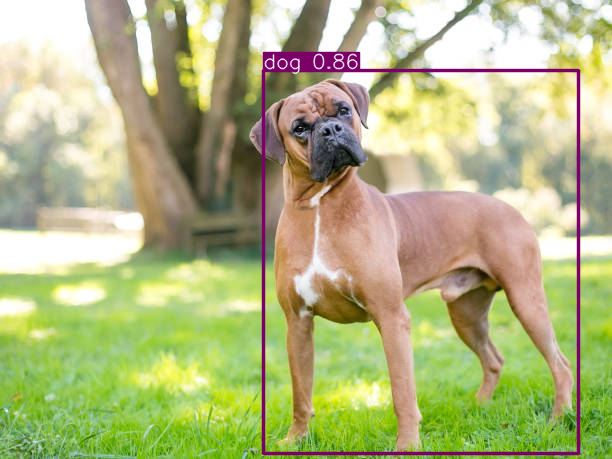

Detected Objects:
Error: Class ID 263 not found in model.names


In [2]:
import torch
from pathlib import Path
from PIL import Image

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5:master', 'yolov5s')

def detect_and_recognize_objects(image_path):
    img = Image.open(image_path)

    results = model(img)

    results.show()

    detected_objects = results.xyxy[0].cpu().numpy()

    print("Detected Objects:")
    for obj in detected_objects:
        class_id, confidence, x_min, y_min, x_max, y_max = obj[:6]
        try:
            class_name = model.names[int(class_id)]
            print(f"Class: {class_name}, Confidence: {confidence:.2f}, Bounding Box: ({x_min}, {y_min}, {x_max}, {y_max})")
        except KeyError:
            print(f"Error: Class ID {int(class_id)} not found in model.names")

if __name__ == "__main__":
    image_path = "/content/dog.jpg"  # Replace with your image path
    detect_and_recognize_objects(image_path)
